# Text classification: Understanding the Customer's Feedback

---

Text classification is one of the important tasks of text mining

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

In this notebook, we will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. We will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.

We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

The libraries needed in this exercise are:
* [Numpy](http://www.numpy.org/) — a package for scientific computing.
* [Pandas](https://pandas.pydata.org/) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
* [Matplotlib](https://matplotlib.org/) — a package for plotting & visualizations.
* [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
* [NLTK](http://www.nltk.org/) — a platform to work with natural language.

##Loading the data

### Importing the libraries and necessary dictionaries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset in our directory

In [2]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2024-02-08 13:33:57--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   204MB/s    in 0.3s    

2024-02-08 13:33:57 (204 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 1 root root 4.0K Feb  8 12:18 .
drwxr-xr-x 1 root root 4.0K Feb  8 12:17 ..
drwxr-xr-x 4 root root 4.0K Feb  6 14:23 .config
-rw-r--r-- 1 root root  63M Feb  8 13:33 movie_data.csv
drwxr-xr-x 1 root root 4.0K Feb  6 14:23 sample_data


###Reading the dataset file and getting info on it
**Question 1:** Use pandas to read the csv file and display the first 5 rows

In [3]:
# path to IMDB dataseet
file_path = "movie_data.csv"

# read file (dataset) into our program using pandas
movie_data = pd.read_csv(file_path)

# display first 5 rows
print(movie_data.head())

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1


Getting info on our dataset

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


A balanced dataset in sentiment analysis is a dataset which holds an equal amount of positive sentiment data and negative sentiment data, meaning 50% of the data is positive and 50% is negative

**Question 2:** Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

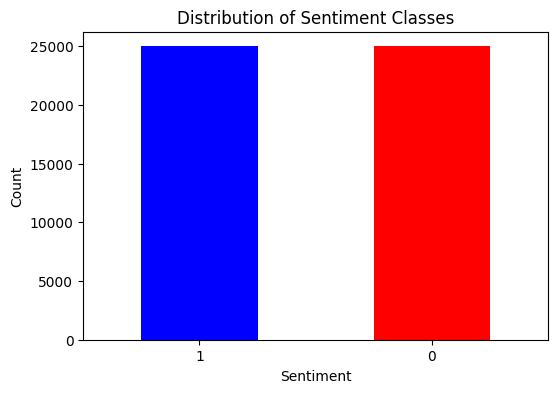

1    25000
0    25000
Name: sentiment, dtype: int64


In [5]:
import matplotlib.pyplot as plt

# Count the number of positive and negative sentiment samples
sentiment_counts = movie_data['sentiment'].value_counts()

# Plotting the distribution of sentiment classes
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.show()

# Print the counts of each sentiment class
print(sentiment_counts)

## Text cleaning

In [6]:
print(movie_data.review[10])

I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this movi

**Question 3:** Let's define a function that would clean each movie review (sentence)

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

# Define cleaning function
def clean_review(text):
    # Remove non-alphanumeric characters and special symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in english_stopwords]

    # Apply stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text



**Question 4 :** Try it out on an instance of the dataset then on the entire dataset.

In [8]:
sample_size = 5  # Define the size of the sample
sample_data = movie_data['review'].sample(sample_size)  # Select a random sample of reviews

# Apply the clean_review function to the sample of the dataset
cleaned_sample_data = sample_data.apply(clean_review)
print("\noriginal sample:")
print(sample_data)
print("\nSample of Cleaned Reviews:")
print(cleaned_sample_data)


original sample:
15351    On the face of it this film looked like it mig...
32284    Saw this again recently on Comedy Central. I'd...
49674    When the employees of a theater find an old re...
11755    Before this was shown on MTV or VH1 it was at ...
14763    Some movies you watch and you say, "Well, that...
Name: review, dtype: object

Sample of Cleaned Reviews:
15351    face film look like might realli good isntbr b...
32284    saw recent comedi central id love see jean sch...
49674    employe theater find old reel film decid show ...
11755    shown mtv vh1 local theatr play main movi reme...
14763    movi watch say well made sens dont realli mean...
Name: review, dtype: object


And now clean the entire dataset reviews

In [9]:
# Apply the clean_review function to the entire dataset
movie_data['clean_review'] = movie_data['review'].apply(clean_review)

# Display the first few rows of the dataset with the cleaned reviews
print(movie_data.head())

                                              review  sentiment  \
0  I went and saw this movie last night after bei...          1   
1  Actor turned director Bill Paxton follows up h...          1   
2  As a recreational golfer with some knowledge o...          1   
3  I saw this film in a sneak preview, and it is ...          1   
4  Bill Paxton has taken the true story of the 19...          1   

                                        clean_review  
0  went saw movi last night coax friend mine ill ...  
1  actor turn director bill paxton follow promis ...  
2  recreat golfer knowledg sport histori pleas di...  
3  saw film sneak preview delight cinematographi ...  
4  bill paxton taken true stori 1913 us golf open...  


## Split dataset for training and testing
We will split our data into two subsets: a 50% subset will be used for training the model for prediction and the remaining 50% will be used for evaluating or testing its performance. The random state ensures reproducibility of the results.

**Question 5:** Split your data to get x_train, x_test, y_train and y_test.

In [10]:
from sklearn.model_selection import train_test_split

# Features (X) are the cleaned reviews
X = movie_data['clean_review']

# Target variable (y) is the sentiment
y = movie_data['sentiment']

# Split data into 50% training & 50% test
# Use a random state of 42 to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Print the shapes of the training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## Feature extraction with Bag of Words


**Question 6:**  In this section, apply the Bag of Words method to learn the vocabulary of your text and with it transform your training input data.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a CountVectorizer (with binary=True and max_features=10000)
vectorizer = CountVectorizer(binary=True, max_features=10000)

# Learn the vocabulary of all tokens in our training dataset
vectorizer.fit(X_train)

# Transform x_train to bag of words
x_train_bow = vectorizer.transform(X_train)
x_test_bow = vectorizer.transform(X_test)

# Print the shapes of the transformed data
print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


## Classification

**Question 7:** Your data is ready for classification. For this task use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [12]:
from sklearn.linear_model import LogisticRegression

# Define the LogisticRegression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(x_train_bow, y_train)

# Get the mean accuracy on the training data
acc_train = classifier.score(x_train_bow, y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.98348


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question 8:**  Evaluating the performance of your model through its accuracy score

In [13]:
# Evaluate model with test data

from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred_test = classifier.predict(x_test_bow)

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Test Accuracy:', accuracy_test)

Test Accuracy: 0.86664


## Bonus: Let's use the model to predict!
To do so, let's create a predict function which takes as argument your model and the bag of words vectorizer together with a review on which it would predict the sentiment. This review should be cleaned with the `clean_review` function we built, transformed by bag of words and then used for prediction with `model.predict()`.

In [14]:
# define predict function
def predict_sentiment(model, vectorizer, review):
    # Clean the review
    cleaned_review = clean_review(review)

    # Transform the cleaned review into bag-of-words representation
    bow_representation = vectorizer.transform([cleaned_review])

    # Predict the sentiment using the model
    predicted_sentiment = model.predict(bow_representation)

    # Return the predicted sentiment
    return predicted_sentiment[0]



And let's try it out on an example

In [15]:
# Test the predict function
review = "The movie was great!!"
predicted_sentiment = predict_sentiment(classifier, vectorizer, review)
print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: 1


In [16]:
review2 = "The movie was bad!!"
predicted_sentiment = predict_sentiment(classifier, vectorizer, review2)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: 0


In [17]:
review3 = "boring!"
predicted_sentiment = predict_sentiment(classifier, vectorizer, review3)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: 0


In [18]:
review4 = "intersting!"
predicted_sentiment = predict_sentiment(classifier, vectorizer, review4)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: 1


Now we Plot the ROC curve to evaluate the performance of the classifier.
The ROC curve visualizes the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR)
across different threshold values.

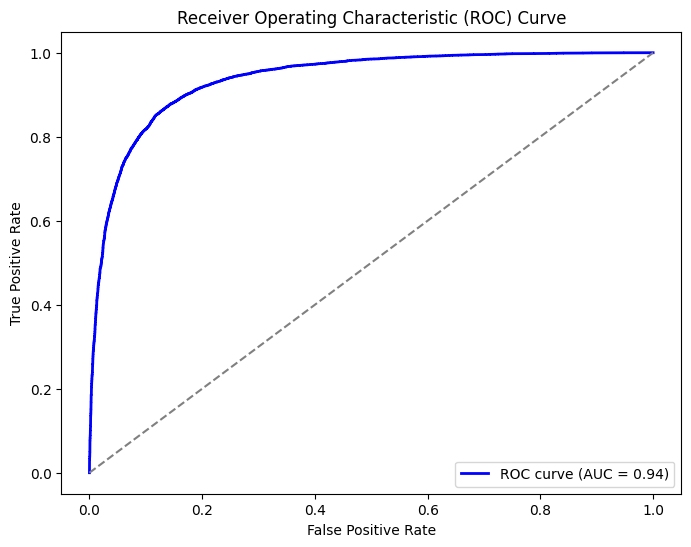

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_prob_positive = classifier.predict_proba(x_test_bow)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob_positive)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()